# Team Assignment - Team 1, MBan Cohort 2
### Ernest Owusu
### Juan Arzola
### Gisela Chansa
### Zarah Fwa
### Ilora Bandyopadhyay 
### Wissem Labbadi

# INTRODUCTION

In today's competitive business ecosystem, understanding salary trends across diverse regions is crucial for individuals seeking career advancement and businesses seeking global talent. This data analysis project explores the field of global salaries, utilizing Python to uncover insights from a comprehensive dataset sourced from https://www.kaggle.com/datasets/amirmahdiabbootalebi/salary-by-job-title-and-country . 

We want to identify what, if any, correlations exist between Age, Year of Experience and Salary. Ideally, these findings could contribute to understanding how University students can set realistic career expectations, negotiate salaries effectively, and better prepare for their job searches, enabling them to navigate their career paths with informed decision-making and strategic planning.

We begin our analysis by uploading the dataset to python and creating the path to the location of the file.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore") # This is to ignore any warnings

# Basic libraries to manipulate data
import matplotlib.pyplot as plt # Matplotlib for data visualisation
import numpy as np # Numpy for numerical computations
import pandas as pd # Pandas for data manipulation

np.random.seed(42) # To ensure all the probabilistic things are represented

## Background on Data

This salary dataset provides a good source of information on salaries across five countries: the United States, the United Kingdom, Canada, China, and Australia. The data consists of a range of variables, including job title, years of experience, and salary amounts, gender, enabling a comprehensive analysis of salary trends.

The dataset shows a comprehensive collection of salary information from various industries and regions across the globe. Analysis of this data helps to gain insights into job market trends, compare compensation across different professions, and make informed decisions about ones career or hiring strategies. The dataset is cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes.

### Education Level:

0 : High School
1 : Bachelor Degree
2 : Master Degree
3 : Phd

Currency : US Dollar

Senior : It shows that this employee has a senior position or no.(Binary)

# Basic Characteristics of the datasets

In [2]:
# Specify the path to the datasets
data_path = "./data/"

In [3]:
# Specify the filenames of the datasets
salary_filename = "salary.csv"

# Read the CSV files and create backup copies
salary_df_data = pd.read_csv(data_path + salary_filename)

# Create working copies of the dataframes for analysis
salary_df = salary_df_data.copy()

In [4]:
# A look at the data sample
pd.set_option('display.max_columns',None)
salary_df.sample(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
3089,26.0,Male,2,Full Stack Engineer,3.0,88678.0,USA,Asian,0
5825,34.0,Male,3,Research Director,11.0,160000.0,Canada,Asian,0
1452,27.0,Male,1,Front end Developer,3.0,80000.0,Canada,White,0
5927,32.0,Male,1,Product Manager,7.0,120000.0,Canada,White,0
6071,40.0,Female,1,Financial Manager,16.0,215000.0,China,Chinese,0


In [5]:
# Validation of data types
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


To check the output of values that cannot be converted in float dtype, we will create a function.


In [6]:
def find_non_convertible_floats(series):
    non_convertibles = set()
    for item in series:
        try:
            float(item)
        except ValueError:
            non_convertibles.add(item)
    return non_convertibles

find_non_convertible_floats(salary_df['Age'])

set()


There are no non_convertible_floats in the 'Age' column. The values are not fractional and we prefer simple and accurate figure, whole year for precision, accuracy, compactibility, computational efficiency and the use of less memory.


In [7]:
#Converting dtype to integer.

salary_df['Age']=salary_df['Age'].astype(int)

Years of Experience:

In [8]:
find_non_convertible_floats(salary_df['Years of Experience'])

set()

In [9]:
find_non_convertible_floats(salary_df['Salary'])

set()

Both, Years of Experience and Salary have no non_convertible_floats, hereby returning empty sets. They both are in the preferred dtype which is float and these columns are the columns to be used for our numerical operations computing means, median, standard deviation and other meaningful descriptive statistics. so we wont be converting them.


Categorical Columns:

Gender, Education level, Job title, and Race. These are categorical columns which ought to have a categorical data types. They do provide structure and meaning to data analysis when in a categorical data structure compared to any other data type.


Gender:

In [10]:
salary_df['Gender'].value_counts(dropna=False)

Male      3671
Female    3013
Name: Gender, dtype: int64

In [11]:
3671 + 3013

6684

Confirmation of the absence of missing values ('na' or 'Nan')

Next, the conversion of data type.

In [12]:
salary_df['Gender']=salary_df['Gender'].astype('category')

Education Level:

In [13]:
salary_df['Education Level'].value_counts(dropna=False)

1    3021
2    1858
3    1369
0     436
Name: Education Level, dtype: int64

In [14]:
Education_Level = salary_df['Education Level']
Education_Level

0       1
1       2
2       3
3       1
4       2
       ..
6679    3
6680    0
6681    1
6682    2
6683    0
Name: Education Level, Length: 6684, dtype: int64

Convert data type and then, rename the Education level categories from numeric to text. and the conversion of data type. this will enable us perform the category mapping and renaming.

In [15]:
salary_df['Education Level']=salary_df['Education Level'].astype('category')

In [16]:
Education_Level = pd.Categorical(salary_df['Education Level'])

In [17]:
Category_mapping = {0: 'High School', 1: 'Bachelor Degree', 2: 'Master Degree', 3: 'Phd'}

In [18]:
salary_df['Education Level'] = salary_df['Education Level'].cat.rename_categories(Category_mapping)

In [19]:
print(salary_df['Education Level'].dtype)

category


In [20]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6684 non-null   int32   
 1   Gender               6684 non-null   category
 2   Education Level      6684 non-null   category
 3   Job Title            6684 non-null   object  
 4   Years of Experience  6684 non-null   float64 
 5   Salary               6684 non-null   float64 
 6   Country              6684 non-null   object  
 7   Race                 6684 non-null   object  
 8   Senior               6684 non-null   int64   
dtypes: category(2), float64(2), int32(1), int64(1), object(3)
memory usage: 352.9+ KB


Job Title:


In [21]:
salary_df['Job Title'].value_counts(dropna=False)

Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: Job Title, Length: 129, dtype: int64

checking for null Values in the Job Title column.

In [22]:
null_values = salary_df['Job Title'].isnull()
print(null_values)

0       False
1       False
2       False
3       False
4       False
        ...  
6679    False
6680    False
6681    False
6682    False
6683    False
Name: Job Title, Length: 6684, dtype: bool


In [23]:
salary_df['Job Title']=salary_df['Job Title'].astype('category')

Race:
    

In [24]:
salary_df['Race'].value_counts(dropna=False)

White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: Race, dtype: int64

Confirmation of the absence of missing values ('na' or 'Nan')

Next, the conversion of data type.

In [25]:
# Checking for duplicates

salary_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6679    False
6680    False
6681    False
6682    False
6683     True
Length: 6684, dtype: bool

In [26]:
# Checking for duplicates in the dataset

salary_df[salary_df.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
252,28,Male,Bachelor Degree,Business Development Associate,2.0,40000.0,USA,Asian,0
308,29,Female,Bachelor Degree,Business Development Associate,1.5,35000.0,Australia,White,0
343,33,Male,Bachelor Degree,Business Analyst,4.0,60000.0,Canada,Black,0
372,44,Female,Phd,Business Analyst,15.0,150000.0,UK,White,1
390,31,Female,Bachelor Degree,Software Engineer,6.0,155000.0,UK,Welsh,0
...,...,...,...,...,...,...,...,...,...
6663,51,Female,Master Degree,Content Marketing Manager,19.0,190000.0,UK,White,0
6664,37,Male,Bachelor Degree,Sales Director,7.0,90000.0,China,Chinese,0
6672,24,Male,Bachelor Degree,Sales Executive,1.0,35000.0,Canada,Asian,0
6677,51,Female,Master Degree,Product Marketing Manager,19.0,190000.0,UK,White,1


The presence of duplicate job titles within the dataset arises from various factors, including differences in race, gender, country, and salary. Due to these underlying factors, it is not possible to eliminate these duplicates without compromising the integrity of the data.

In [27]:
salary_df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
6679,False,False,False,False,False,False,False,False,False
6680,False,False,False,False,False,False,False,False,False
6681,False,False,False,False,False,False,False,False,False
6682,False,False,False,False,False,False,False,False,False


This code indicated that there are no missing values in our data set.

In [28]:
# Looking for missing values in the data set

salary_df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [29]:
salary_df['Race']=salary_df['Race'].astype('category')

Seniors:
this column is to differentiate between those considered as seniors and those who are not, there is no in between, its either a Yes or a no, true or false. Assigning the dtype for this column as integer isnt appropriate, therefore we change it to a boolean.

In [30]:
salary_df['Senior']=salary_df['Senior'].astype('boolean')

In [31]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6684 non-null   int32   
 1   Gender               6684 non-null   category
 2   Education Level      6684 non-null   category
 3   Job Title            6684 non-null   category
 4   Years of Experience  6684 non-null   float64 
 5   Salary               6684 non-null   float64 
 6   Country              6684 non-null   object  
 7   Race                 6684 non-null   category
 8   Senior               6684 non-null   boolean 
dtypes: boolean(1), category(4), float64(2), int32(1), object(1)
memory usage: 234.4+ KB


In [32]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32,Male,Bachelor Degree,Software Engineer,5.0,90000.0,UK,White,False
1,28,Female,Master Degree,Data Analyst,3.0,65000.0,USA,Hispanic,False
2,45,Male,Phd,Manager,15.0,150000.0,Canada,White,True
3,36,Female,Bachelor Degree,Sales Associate,7.0,60000.0,USA,Hispanic,False
4,52,Male,Master Degree,Director,20.0,200000.0,USA,Asian,False


In [33]:
salary_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  6684 non-null   int32   
 1   Gender               6684 non-null   category
 2   Education Level      6684 non-null   category
 3   Job Title            6684 non-null   category
 4   Years of Experience  6684 non-null   float64 
 5   Salary               6684 non-null   float64 
 6   Country              6684 non-null   object  
 7   Race                 6684 non-null   category
 8   Senior               6684 non-null   boolean 
dtypes: boolean(1), category(4), float64(2), int32(1), object(1)
memory usage: 234.4+ KB


In [34]:
#looking for an index for our data set
salary_df.nunique()

Age                     41
Gender                   2
Education Level          4
Job Title              129
Years of Experience     37
Salary                 437
Country                  5
Race                    10
Senior                   2
dtype: int64

We can see that no columns is close to being an index,so we try to add an index using 'reset'

In [35]:
salary_df.reset_index()

,index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,0,32,Male,Bachelor Degree,Software Engineer,5.0,90000.0,UK,White,False
1,1,28,Female,Master Degree,Data Analyst,3.0,65000.0,USA,Hispanic,False
2,2,45,Male,Phd,Manager,15.0,150000.0,Canada,White,True
3,3,36,Female,Bachelor Degree,Sales Associate,7.0,60000.0,USA,Hispanic,False
4,4,52,Male,Master Degree,Director,20.0,200000.0,USA,Asian,False
...,...,...,...,...,...,...,...,...,...,...
6679,6679,49,Female,Phd,Director of Marketing,20.0,200000.0,UK,Mixed,False
6680,6680,32,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian,False
6681,6681,30,Female,Bachelor Degree,Financial Manager,4.0,55000.0,China,Chinese,False
6682,6682,46,Male,Master Degree,Marketing Manager,14.0,140000.0,China,Korean,False


In [36]:
# Checking for outliers in the dataset

salary_df.describe()

,Age,Years of Experience,Salary
count,6684.000000,6684.000000,6684.000000
mean,33.610563,8.077723,115307.175194
std,7.595994,6.029305,52806.810881
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


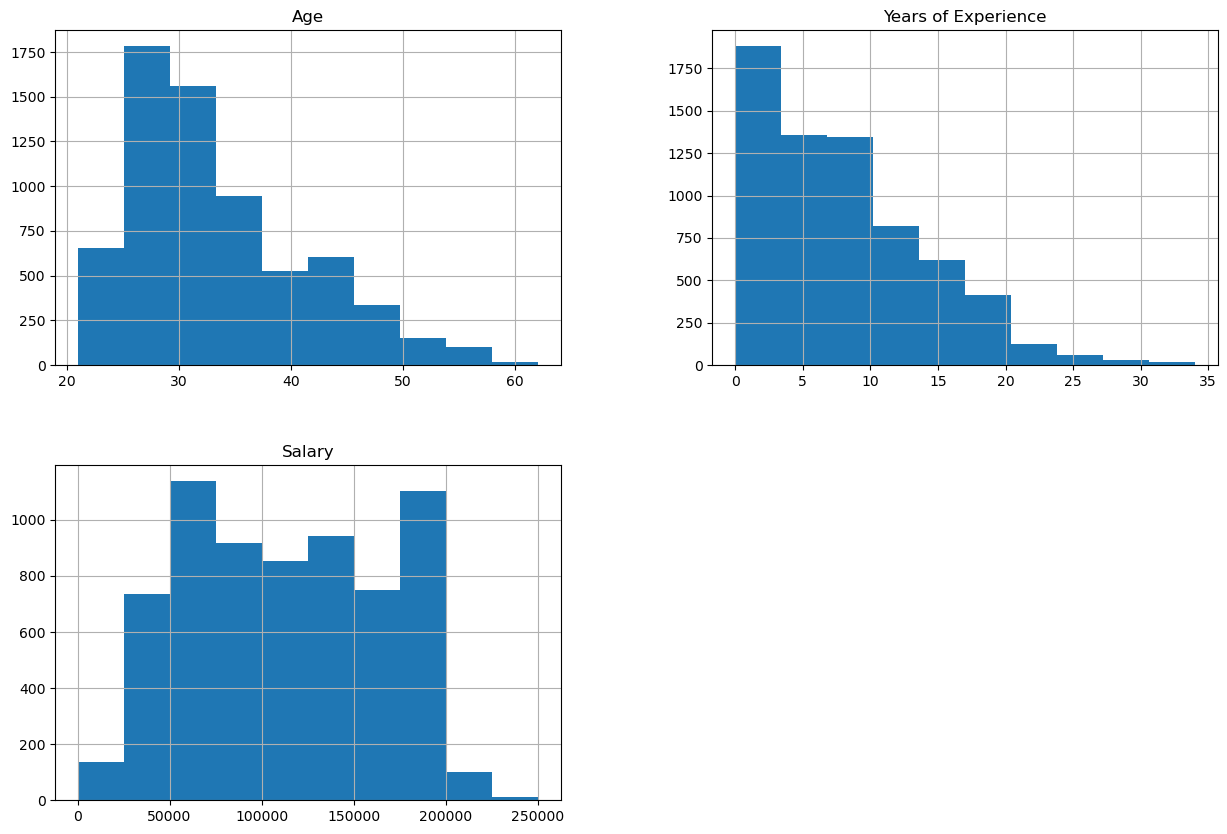

In [37]:
salary_df.hist(figsize=(15,10));

Observations from the above plot;

All the columns do not have negative values and outliers.

Age:
From the histogram, the ages between 21 and 35 dominatee in the job market, although there are some older employees in the dataset.
 

Years of Experience:
Majority of employees are entry level employees with less working experience(0 and 20). Employees with the most experience are few.

Salary:
The majority of the salaries are concentrated between 50,000 and 200,000 per annum for almost every employee.


<Axes: >

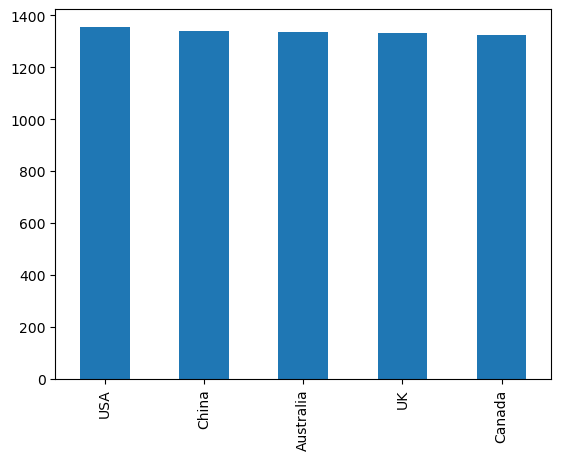

In [38]:
salary_df['Country'].value_counts().plot(kind='bar')


The bar chart displays a fair distribution of the employees from all the countries sampled. 

<Axes: ylabel='Education Level'>

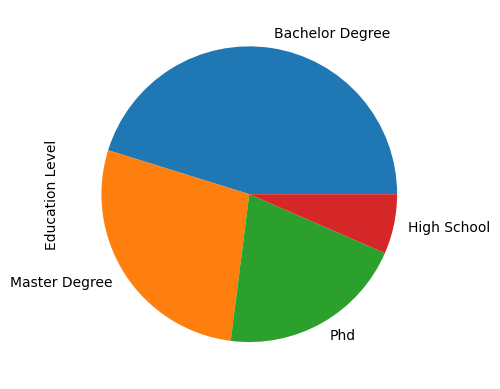

In [39]:
salary_df['Education Level'].value_counts().plot(kind='pie')


Among all employees, those with a bachelor's degree constitute the largest proportion

High school diplomas represent the lowest level of education among employees

In [40]:
import seaborn as sns

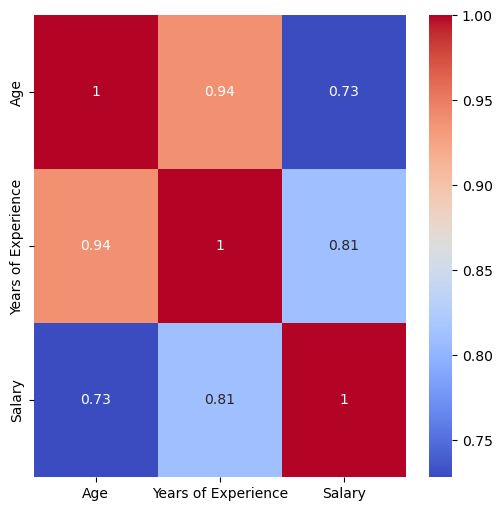

In [41]:
# Correlation Matrix
plt.figure(figsize=(6,6)) 
sns.heatmap(salary_df.select_dtypes(np.number). 
         corr(), annot=True, cmap='coolwarm'); 

Age and years of experience exhibit a strong positive correlation (0.94), indicating that as age increases, years of experience tend to increase as well.

Years of experience and salary demonstrate a strong positive correlation (0.81), implying that as years of experience accumulate, salary tends to rise.

Age and salary exhibit a positive correlation (0.73), suggesting that as age increases, salary tends to increase as well.

In [42]:
pivot_table = salary_df.pivot_table(index='Education Level', values='Salary',aggfunc='mean')
pivot_table

,Salary
Education Level,
High School,34415.612385
Bachelor Degree,95082.908640
Master Degree,130078.384822
Phd,165651.457999


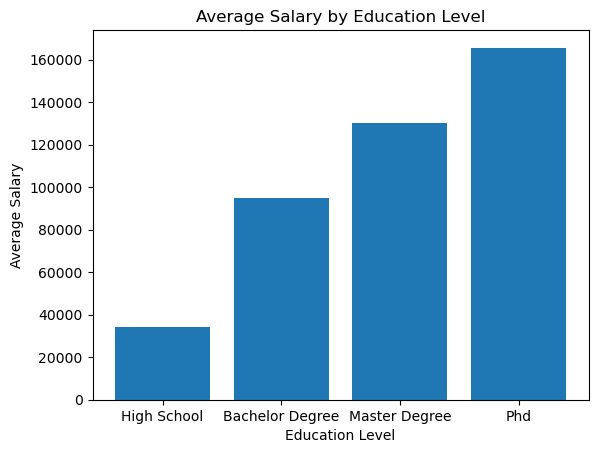

In [43]:
# Group the data by education level and calculate the average salary for each group
average_salary_by_education_level = salary_df.groupby('Education Level')['Salary'].mean()
# Visualize the average salary by education level
plt.bar(average_salary_by_education_level.index, average_salary_by_education_level.values)
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.title('Average Salary by Education Level')
plt.show()

Average salaries by Education Levels shows interesting variations in salaries across different levels of education. For example, there is a substantial difference in average earnings between those with High school diploma and those with a PHD.

In [44]:
#Pivoting
pd.DataFrame(salary_df.groupby(['Education Level','Years of Experience'])['Salary'].aggregate(['mean','count']))


mean  count
Education Level Years of Experience                      
High School     0.0                   25845.090909     99
                0.5                            NaN      0
                1.0                   29902.572193    187
                1.5                            NaN      0
                2.0                   36534.092784     97
...                                            ...    ...
Phd             30.0                 152674.500000      4
                31.0                 194586.000000      2
                32.0                 191371.142857      7
                33.0                 185485.000000      4
                34.0                 188651.000000      2

[148 rows x 2 columns]

Employees with higher education levels tend to have more years of experience and, consequently, higher average salaries. For instance, those with a Ph.D. and over 30 years of experience have an average salary of nearly $195,000. The table highlights the positive correlation between education, experience, and earning potential.

In [45]:
# Melting the data
melted_data = salary_df.melt(id_vars=['Education Level'],value_vars=['Salary','Years of Experience'])
melted_data

,Education Level,variable,value
0,Bachelor Degree,Salary,90000.0
1,Master Degree,Salary,65000.0
2,Phd,Salary,150000.0
3,Bachelor Degree,Salary,60000.0
4,Master Degree,Salary,200000.0
...,...,...,...
13363,Phd,Years of Experience,20.0
13364,High School,Years of Experience,3.0
13365,Bachelor Degree,Years of Experience,4.0
13366,Master Degree,Years of Experience,14.0


This dataframe comprises the sizes of all employees along with thier respective values of education level and salary.The outcome depicts there is no clear relationship between education level and salary, but the second variable(Year of Experience) of the outcome depicts that those with higher educational levels tends to have a high years of experience. 

## Binning and Discretization
The aim is to convert a continuous feature into categorical or ordinal data (depending on if the column reflects order or not) and transforming continuous data into discrete bins.

In [46]:
bins=[18,30,40,50,60,70]
labels=['Young Adult (18-30)', 'Adult (30-40)', 
        'Middle Aged (40-50)', 'Senior (50-60)', 'Elderly (60-70)']

In [47]:
salary_df['Age Group']= pd.cut(salary_df['Age'], bins=bins, labels=labels)
salary_df[['Age','Age Group']]

,Age,Age Group
0,32,Adult (30-40)
1,28,Young Adult (18-30)
2,45,Middle Aged (40-50)
3,36,Adult (30-40)
4,52,Senior (50-60)
...,...,...
6679,49,Middle Aged (40-50)
6680,32,Adult (30-40)
6681,30,Young Adult (18-30)
6682,46,Middle Aged (40-50)


In [48]:
grouped=salary_df.groupby(['Age Group', 'Salary']).size().unstack(fill_value=0)
proportions=grouped.div(grouped.sum(axis=1), axis=0)
proportions

Salary,350.0,500.0,550.0,579.0,25000.0,26000.0,28000.0,30000.0,31000.0,32000.0,33000.0,35000.0,36000.0,37000.0,38000.0,40000.0,41000.0,42000.0,43000.0,45000.0,47000.0,47898.0,48000.0,49000.0,50000.0,51265.0,51831.0,51832.0,52000.0,52612.0,52731.0,52779.0,52807.0,52831.0,55000.0,55538.0,55935.0,57000.0,58000.0,60000.0,61000.0,61095.0,62000.0,62807.0,63789.0,63901.0,64182.0,65000.0,65840.0,67556.0,68000.0,68472.0,68611.0,68732.0,70000.0,70022.0,70216.0,70397.0,71000.0,71699.0,72000.0,72389.0,72649.0,73218.0,73640.0,73895.0,73938.0,74000.0,75000.0,75072.0,75656.0,75969.0,76742.0,76898.0,77000.0,77606.0,77766.0,78354.0,79652.0,79767.0,80000.0,80247.0,82683.0,82697.0,82944.0,83577.0,84181.0,84407.0,85000.0,85825.0,87584.0,88035.0,88552.0,88678.0,89000.0,89843.0,89995.0,90000.0,90249.0,90452.0,90944.0,91000.0,91062.0,91397.0,91903.0,92000.0,92438.0,94502.0,95000.0,95845.0,96000.0,98568.0,99000.0,99363.0,99747.0,100000.0,100052.0,100151.0,100358.0,100425.0,100679.0,100867.0,101000.0,101186.0,101332.0,101733.0,102465.0,102828.0,102859.0,102868.0,103282.0,103579.0,103947.0,104000.0,104378.0,104661.0,104702.0,105000.0,105725.0,106132.0,106218.0,106278.0,106492.0,106662.0,106686.0,107718.0,107895.0,107906.0,108204.0,108267.0,108607.0,108799.0,110000.0,110707.0,111535.0,112000.0,112439.0,113000.0,113065.0,113334.0,113563.0,114290.0,114776.0,115000.0,115920.0,117000.0,117314.0,117904.0,119000.0,119224.0,119419.0,119836.0,119918.0,120000.0,120177.0,120288.0,121120.0,121432.0,121450.0,121454.0,122000.0,122354.0,122485.0,122581.0,122970.0,123386.0,123781.0,124071.0,124141.0,125000.0,125091.0,126520.0,126593.0,126753.0,126916.0,127000.0,127346.0,128078.0,128712.0,128999.0,129686.0,130000.0,130275.0,130355.0,130356.0,131000.0,131547.0,131860.0,131960.0,132442.0,132638.0,132720.0,133326.0,134482.0,134641.0,134858.0,134979.0,135000.0,135378.0,135596.0,135853.0,136062.0,136285.0,136449.0,136533.0,136662.0,136986.0,137000.0,137336.0,137489.0,137775.0,137878.0,138000.0,138032.0,138286.0,138662.0,138859.0,139095.0,139398.0,139413.0,139817.0,140000.0,140010.0,141090.0,141735.0,142000.0,142360.0,142421.0,143084.0,143705.0,143814.0,143885.0,144496.0,144647.0,145000.0,145052.0,146000.0,146075.0,146351.0,146508.0,147326.0,147708.0,148437.0,148446.0,148727.0,149198.0,149217.0,149748.0,150000.0,150248.0,150301.0,150534.0,150729.0,150901.0,151078.0,151310.0,151315.0,151670.0,151901.0,152000.0,152039.0,152168.0,152203.0,152560.0,152726.0,152944.0,154207.0,154281.0,154990.0,155000.0,155414.0,155795.0,155944.0,156486.0,157000.0,157872.0,160000.0,160976.0,161568.0,161621.0,162000.0,162231.0,162454.0,163209.0,163398.0,163558.0,163780.0,163978.0,165000.0,165919.0,166375.0,166512.0,166828.0,166958.0,167015.0,167207.0,167924.0,168000.0,168287.0,168304.0,168691.0,168906.0,169159.0,170000.0,170226.0,170995.0,171036.0,171468.0,171652.0,172925.0,172955.0,173582.0,173851.0,174000.0,174305.0,174324.0,174336.0,174436.0,174726.0,174821.0,174938.0,174985.0,175000.0,175684.0,175966.0,176643.0,177002.0,177177.0,177347.0,177862.0,177913.0,178284.0,178684.0,178859.0,179000.0,179045.0,179180.0,179756.0,179987.0,180000.0,180367.0,180958.0,181021.0,181132.0,181285.0,181699.0,181714.0,181902.0,182000.0,182013.0,182237.0,182392.0,182506.0,182768.0,183000.0,183020.0,183138.0,183417.0,183530.0,183690.0,184006.0,184480.0,184660.0,184816.0,185000.0,185038.0,185119.0,185462.0,185982.0,186321.0,186610.0,186794.0,186963.0,187081.0,187120.0,187951.0,188232.0,188288.0,188484.0,188651.0,190000.0,190004.0,190543.0,190596.0,191159.0,191239.0,191267.0,191510.0,191790.0,191818.0,191915.0,192211.0,192292.0,192344.0,192756.0,193000.0,193746.0,193964.0,194214.0,194638.0,194778.0,195000.0,195270.0,196000.0,197000.0,197354.0,198000.0,200000.0,204000.0,210000.0,215000.0,219000.0,220000.0,225000.0,228000.0,240000.0,250000.0
Age Group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

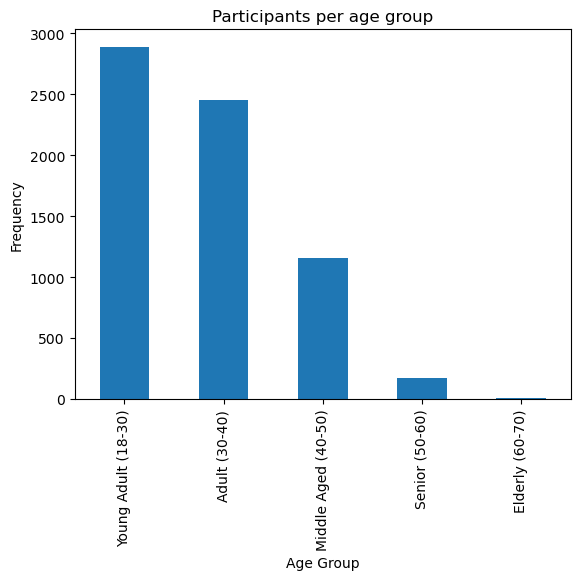

In [49]:
# Understanding the distribution of Age in the working sample data.

plt.title('Participants per age group')
grouped.sum(axis=1).plot(kind='bar')
plt.ylabel('Frequency')
plt.show()

It can be noted that majority of employees are Young Adults(18 - 30)

In [50]:
mean_age = salary_df['Age'].mean()
median_age = salary_df['Age'].median()
mode_age = salary_df['Age'].mode()[0]

In [51]:
std_dev_age = salary_df['Age'].std()
variance_age = salary_df['Age'].var()

In [52]:
max_age = salary_df['Age'].max()
min_age = salary_df['Age'].min()

In [53]:
print(f"The age range is has {min_age} rows and {max_age} columns.")

The age range is has 21 rows and 62 columns.


In [54]:
age_range=max_age-min_age
deciles_age=salary_df['Age'].quantile([i/10 for i in range(1,11)])

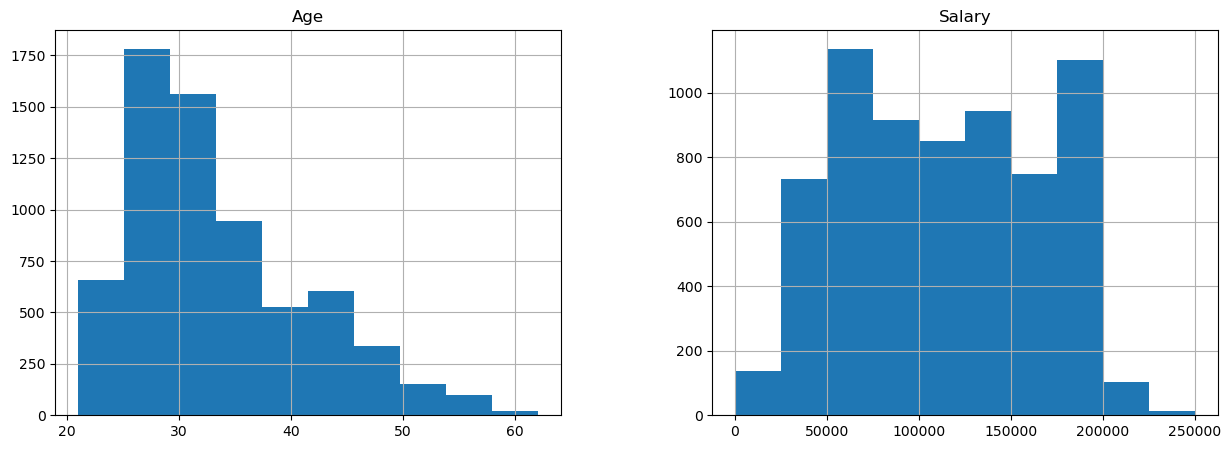

In [55]:
salary_df[['Age','Salary']].hist(figsize=(15,5))
plt.show()

In [56]:
job_groups={0:'Specialist','Front end Developer ':'Specialist','Account Executive':'Executive','Account Manager':'Manager','Accountant':'Executive','Administrative Assistant':'Specialist','Advertising Coordinator':'Specialist','Back end Developer':'Specialist','Business Analyst':'Analyst','Business Development Associate':'Specialist','Business Development Manager':'Manager','Business Intelligence Analyst':'Analyst','Business Operations Analyst':'Analyst','CEO':'Chief','Chief Data Officer':'Chief','Chief Technology Officer':'Chief','Consultant':'Specialist','Content Marketing Manager':'Manager','Copywriter':'Specialist','Creative Director':'Director','Customer Service Manager':'Manager','Customer Service Rep':'Specialist','Customer Service Representative':'Executive','Customer Success Manager':'Manager','Customer Success Rep':'Executive','Customer Support Specialist':'Executive','Data Analyst':'Analyst','Data Engineer':'Specialist','Data Entry Clerk':'Specialist','Data Scientist':'Specialist','Delivery Driver':'Specialist','Designer':'Specialist','Developer':'Specialist','Digital Content Producer':'Specialist','Digital Marketing Manager':'Manager','Digital Marketing Specialist':'Specialist','Director':'Director','Director of Business Development':'Director','Director of Data Science':'Director','Director of Engineering':'Director','Director of Finance':'Director','Director of HR':'Director','Director of Human Capital':'Director','Director of Human Resources':'Director','Director of Marketing':'Director','Director of Operations':'Director','Director of Product Management':'Director','Director of Sales':'Director','Director of Sales and Marketing':'Director','Engineer':'Specialist','Event Coordinator':'Specialist','Financial Advisor':'Specialist','Financial Analyst':'Analyst','Financial Manager':'Manager','Front end Developer':'Specialist','Full Stack Engineer':'Specialist','Graphic Designer':'Specialist','Help Desk Analyst':'Analyst','HR Coordinator':'Specialist','HR Generalist':'Specialist','HR Manager':'Manager','HR Specialist':'Specialist','Human Resources Coordinator':'Specialist','Human Resources Director':'Director','Human Resources Manager':'Manager','Human Resources Specialist':'Specialist','IT Consultant':'Specialist','IT Manager':'Manager','IT Project Manager':'Manager','IT Support':'Specialist','IT Support Specialist':'Specialist','Juniour HR Coordinator':'Specialist','Juniour HR Generalist':'Specialist','Manager':'Manager','Marketing Analyst':'Analyst','Marketing Coordinator':'Specialist','Marketing Director':'Director','Marketing Manager':'Manager','Marketing Specialist':'Specialist','Network Engineer':'Specialist','Office Manager':'Manager','Operations Analyst':'Analyst','Operations Coordinator':'Specialist','Operations Director':'Director','Operations Manager':'Manager','Principal Engineer':'Specialist','Principal Scientist':'Specialist','Product Designer':'Specialist','Product Development Manager':'Manager','Product Manager':'Manager','Product Marketing Manager':'Manager','Project Coordinator':'Specialist','Project Engineer':'Specialist','Project Manager':'Manager','Public Relations Manager':'Manager','Quality Assurance Analyst':'Analyst','Receptionist':'Specialist','Recruiter':'Specialist','Research Director':'Director','Research Scientist':'Specialist','Researcher':'Specialist','Sales Associate':'Executive','Sales Director':'Director','Sales Executive':'Executive','Sales Manager':'Manager','Sales Operations Manager':'Manager','Sales Representative':'Executive','Scientist':'Specialist','Social Media Man':'Specialist','Social Media Manager':'Manager','Social Media Specialist':'Specialist','Software Architect':'Specialist','Software Developer':'Specialist','Software Engineer':'Specialist','Software Engineer Manager':'Manager','Software Manager':'Manager','Software Project Manager':'Manager','Strategy Consultant':'Specialist','Supply Chain Analyst':'Analyst','Supply Chain Manager':'Manager','Technical Recruiter':'Specialist','Technical Support Specialist':'Specialist','Technical Writer':'Specialist','Training Specialist':'Specialist','UX Designer':'Specialist','UX Researcher':'Specialist','VP of Finance':'Manager','VP of Operations':'Manager','Web Designer':'Specialist','Web Developer':'Specialist'}

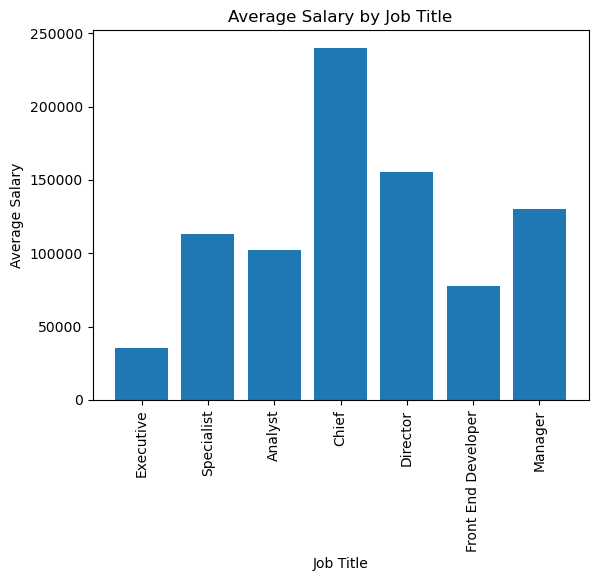

In [57]:
salary_df.loc[:,'Job Title'].replace(job_groups)
salary_df.loc[:,'Job Title']=salary_df.loc[:,'Job Title'].replace(job_groups)
average_salary_by_job_title = salary_df.groupby('Job Title')['Salary'].mean()
plt.bar(average_salary_by_job_title.index, average_salary_by_job_title.values)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Title')
plt.xticks(rotation=90)
plt.show()


The graphs is the average salary per grouped Job Titles , showing the highest earners as Chiefs.

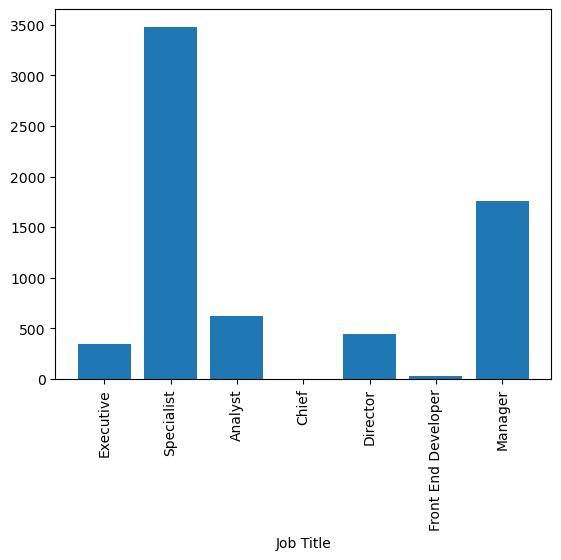

In [58]:
salary_df.loc[:,'Job Title'].replace(job_groups)
salary_df.loc[:,'Job Title']=salary_df.loc[:,'Job Title'].replace(job_groups)
count_salary_by_job = salary_df.groupby('Job Title')['Job Title'].count()
plt.bar(count_salary_by_job.index,count_salary_by_job.values)
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.show()

Output definition:
Analyst: This is made up of all Job Titles that has Analyst as part of the Title in various industries.
Chief: includes CEO, CFO, CTO and COO.
Directors: these are made up of Directors
Executives: job positions that involves interactions with customers
Front End Developers: Includes developers 
Manager: All titles with managers
Specialist: Large group of technical titles e.g Human Resources Specialist and IT Specialist etc.

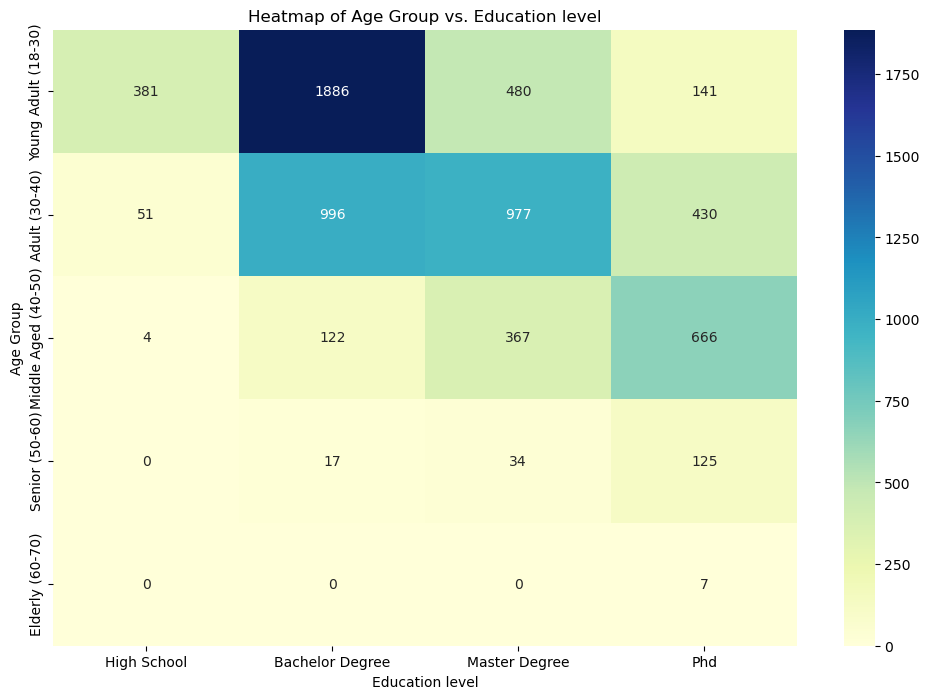

Chi-Square Statistic: 2620.0878327199603
P-value: 0.0
Degrees of Freedom: 12
Expected Frequencies:
[[1.88385398e+02 1.30530341e+03 8.02798324e+02 5.91512867e+02]
 [1.60075404e+02 1.10914632e+03 6.82156194e+02 5.02622083e+02]
 [7.56020347e+01 5.23838869e+02 3.22175643e+02 2.37383453e+02]
 [1.14805506e+01 7.95475763e+01 4.89239976e+01 3.60478755e+01]
 [4.56612807e-01 3.16382406e+00 1.94584081e+00 1.43372232e+00]]


In [59]:
from scipy import stats
import seaborn as sns
# Preparing data for the Chi-Square Test
contingency_table = pd.crosstab(salary_df['Age Group'], salary_df['Education Level'])

 

# Performing Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

 

# Visualization: Heatmap of the contingency table
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Heatmap of Age Group vs. Education level')
plt.ylabel('Age Group')
plt.xlabel('Education level')
plt.show()

 

# Chi-Square Test Result
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

While the statistical analysis indicates no significant association between Age Group and Education Level, the frequency distribution reveals a strong concentration among Young adults with Bachelor degrees.